
## Batter up 

The movie [Moneyball](http://en.wikipedia.org/wiki/Moneyball_(film)) focuses on
the "quest for the secret of success in baseball". It follows a low-budget team, 
the Oakland Athletics, who believed that underused statistics, such as a player's 
ability to get on base, better predict the ability to score runs than typical 
statistics like home runs, RBIs (runs batted in), and batting average. Obtaining 
players who excelled in these underused statistics turned out to be much more 
affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and
examining the linear relationship between runs scored in a season and a number 
of other player statistics. Our aim will be to summarize these relationships 
both graphically and numerically in order to find which variable, if any, helps 
us best predict a team's runs scored in a season.

## Getting Started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.

In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### The data

Let's load up the data for the 2011 season.

In [2]:
data(mlb11)

In [3]:
str(mlb11)

tibble [30 × 12] (S3: tbl_df/tbl/data.frame)
 $ team        : Factor w/ 30 levels "Arizona Diamondbacks",..: 28 4 10 13 26 18 19 16 9 12 ...
 $ runs        : int [1:30] 855 875 787 730 762 718 867 721 735 615 ...
 $ at_bats     : int [1:30] 5659 5710 5563 5672 5532 5600 5518 5447 5544 5598 ...
 $ hits        : int [1:30] 1599 1600 1540 1560 1513 1477 1452 1422 1429 1442 ...
 $ homeruns    : int [1:30] 210 203 169 129 162 108 222 185 163 95 ...
 $ bat_avg     : num [1:30] 0.283 0.28 0.277 0.275 0.273 0.264 0.263 0.261 0.258 0.258 ...
 $ strikeouts  : int [1:30] 930 1108 1143 1006 978 1085 1138 1083 1201 1164 ...
 $ stolen_bases: int [1:30] 143 102 49 153 57 130 147 94 118 118 ...
 $ wins        : int [1:30] 96 90 95 71 90 77 97 96 73 56 ...
 $ new_onbase  : num [1:30] 0.34 0.349 0.34 0.329 0.341 0.335 0.343 0.325 0.329 0.311 ...
 $ new_slug    : num [1:30] 0.46 0.461 0.434 0.415 0.425 0.391 0.444 0.425 0.41 0.374 ...
 $ new_obs     : num [1:30] 0.8 0.81 0.773 0.744 0.766 0.725 0.788 0.7

In addition to runs scored, there are seven traditionally used variables in the 
data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, 
and wins. There are also three newer variables: on-base percentage, slugging 
percentage, and on-base plus slugging. For the first portion of the analysis 
we'll consider the seven traditional variables. At the end of the lab, you'll 
work with the three newer variables on your own.

1. What type of plot would you use to display the relationship between `runs` and one of the other numerical variables? 
<ol>
<li> histogram </li> 
<li> box plot </li> 
<li> scatterplot </li> 
<li> bar plot </li>
</ol>

**Answer**: C. I would use a scatterplot, to analyze relationship among variables.

***

2. Plot the relationship between `runs` and `at_bats`, using `at_bats` as the explanatory variable. <br> The relationship appears to be ...
<ol>
<li> linear </li> 
<li> negative </li> 
<li> horseshoe-shaped ($\cap$) </li>  
<li> u-shaped ($\cup$) </li>
</ol>

**Answer**: A. It seems to be somewhat positive linear. Generally the more `at_bats` the more `runs` obtained.

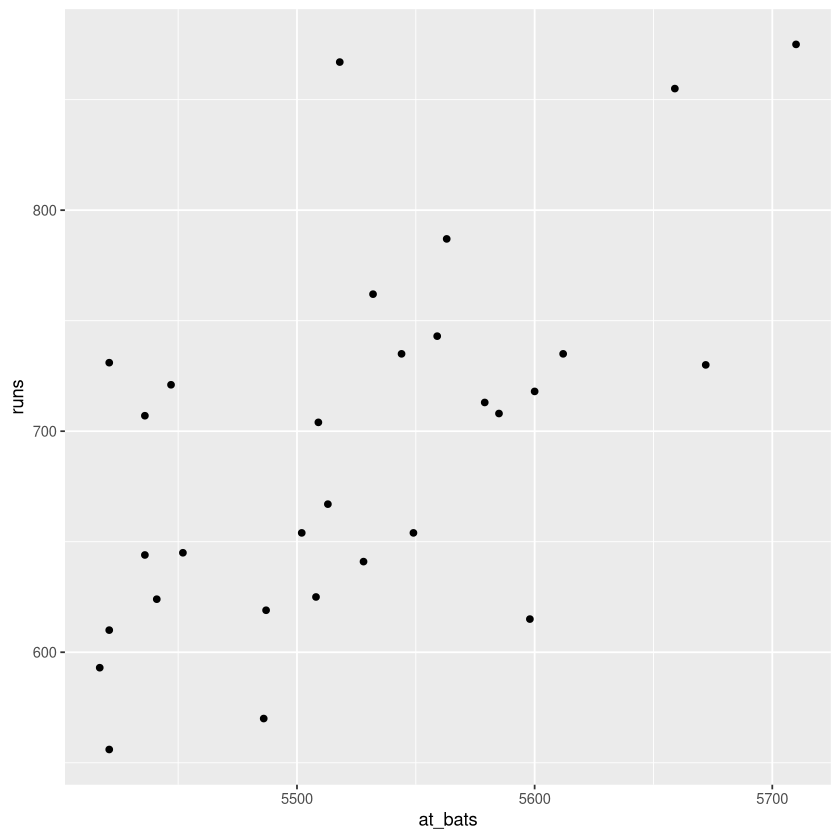

In [4]:
# type your code for Question 2 here, and Knit
ggplot(mlb11, aes(x=at_bats, y=runs)) + geom_point()


**Exercise**: If you knew a team's `at_bats`, would you be comfortable using 
a linear model to predict their number of runs?


If the relationship looks linear, we can quantify the strength of the
relationship with the correlation coefficient.

In [5]:
mlb11 %>%
  summarise(cor(runs, at_bats))

"cor(runs, at_bats)"
<dbl>
0.610627


## Sum of squared residuals

<div id="boxedtext">
In this section you will use an interactive function to investigate what we mean by "sum 
of squared residuals". You will need to run this function in your console, not in your 
markdown document. Running the function also requires that the `mlb11` dataset is loaded 
in your environment.
</div>

Think back to the way that we described the distribution of a single variable. 
Recall that we discussed characteristics such as center, spread, and shape. It's
also useful to be able to describe the relationship of two numerical variables, 
such as `runs` and `at_bats` above.

3. Looking at your plot from the previous exercise, which of the following best describe the relationship between these two variables? 
<ol>
<li> The relationship is negative, linear, and moderately strong. One of the potential outliers is a team with approximately 5520 at bats. </li>
<li> The relationship is positive, linear, and moderately strong. One of the potential outliers is a team with approximately 5520 at bats. </li>
<li> The relationship is positive, linear, and very weak. There are no outliers. </li>
<li> The relationship is positive, linear, and very weak. One of the potential outliers is a team with approximately 5520 at bats. </li>
</ol>

**Answer**: B. positive, linear, and moderately strong with an outlier at 5520 at_bats.

Just as we used the mean and standard deviation to summarize a single variable, 
we can summarize the relationship between these two variables by finding the 
line that best follows their association. Use the following interactive 
function to select the line that you think does the best job of going through 
the cloud of points.

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

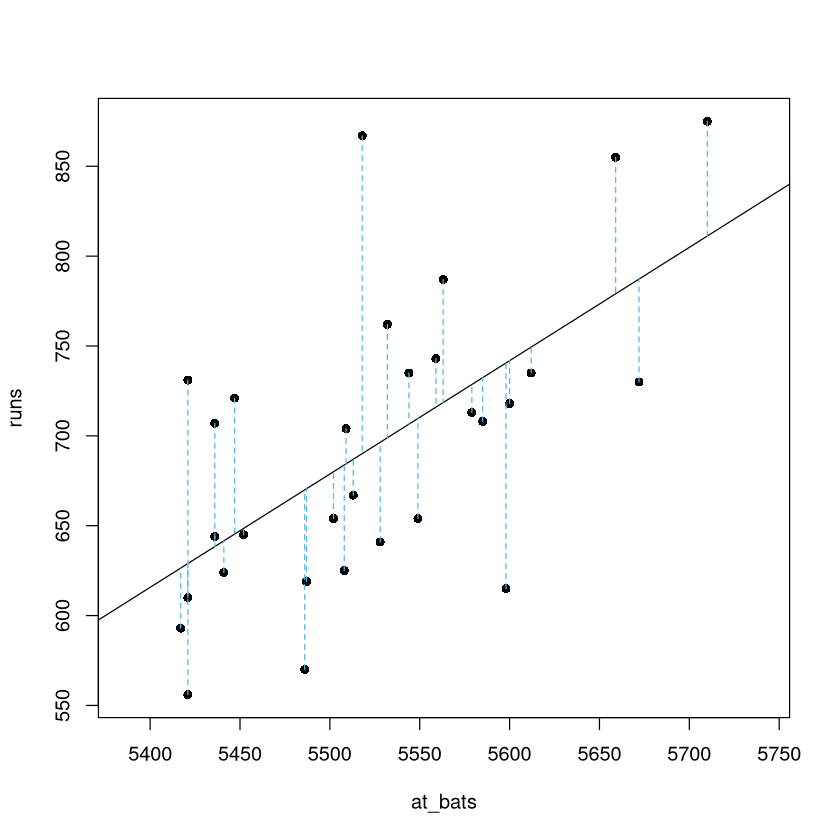

In [6]:
plot_ss(x = at_bats, y = runs, data = mlb11)

After running this command, you'll be prompted to click two points on the plot 
to define a line. Once you've done that, the line you specified will be shown in
black and the residuals in blue. Note that there are 30 residuals, one for each 
of the 30 observations. Recall that the residuals are the difference between the
observed values and the values predicted by the line:

  $e_i = y_i - \hat{y}_i$


The most common way to do linear regression is to select the line that minimizes
the sum of squared residuals. To visualize the squared residuals, you can rerun 
the plot command and add the argument `showSquares = TRUE`.

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

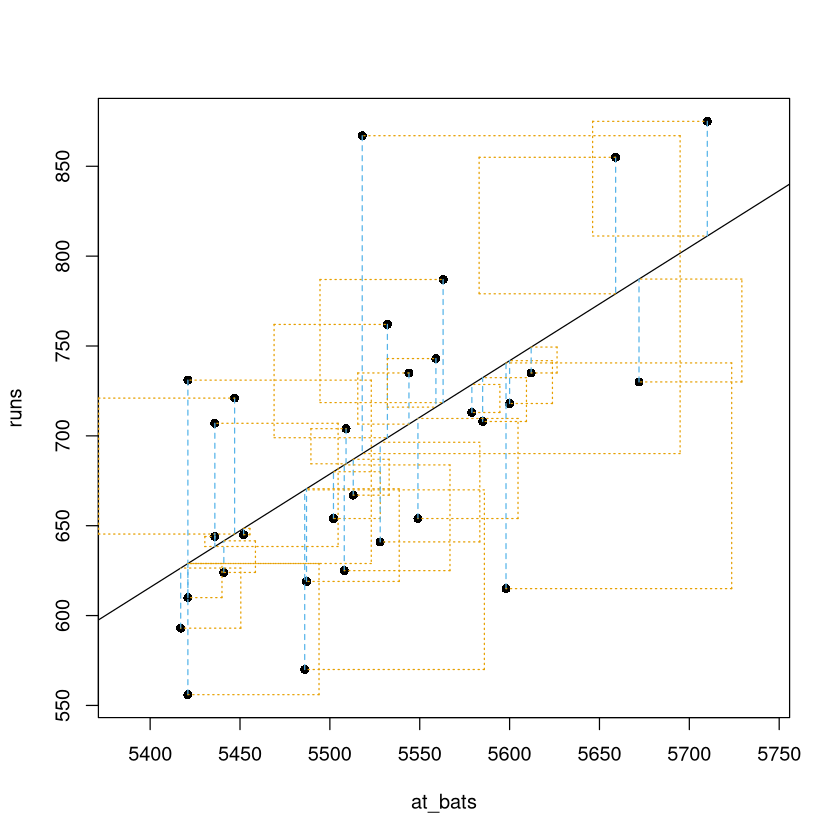

In [7]:
plot_ss(x = at_bats, y = runs, data = mlb11, showSquares = TRUE)

Note that the output from the `plot_ss` function provides you with the slope and
intercept of your line as well as the sum of squares.

<div id="exercise">
**Exercise**: Using `plot_ss`, choose a line that does a good job of minimizing 
the sum of squares.  Run the function several times.  Report your smallest sum 
of squares.
</div>

## The linear model

It is rather cumbersome to try to get the correct least squares line, i.e. the 
line that minimizes the sum of squared residuals, through trial and error. 
Instead we can use the `lm` function in R to fit the linear model (a.k.a. 
regression line).

In [8]:
m1 <- lm(runs ~ at_bats, data = mlb11)

The first argument in the function `lm` is a formula that takes the form 
`y ~ x`. Here it can be read that we want to make a linear model of `runs` as a 
function of `at_bats`. The second argument specifies that R should look in the 
`mlb11` data frame to find the `runs` and `at_bats` variables.

The output of `lm` is an object that contains all of the information we need 
about the linear model that was just fit. We can access this information using 
the summary function.

In [9]:
summary(m1)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


Let's consider this output piece by piece. First, the formula used to describe 
the model is shown at the top. After the formula you find the five-number 
summary of the residuals. The "Coefficients" table shown next is key; its first 
column displays the linear model's y-intercept and the coefficient of `at_bats`.
With this table, we can write down the least squares regression line for the 
linear model:


  $\hat{y} = -2789.2429 + 0.6305 \times at\_bats$

One last piece of information we will discuss from the summary output is the 
Multiple R-squared, or more simply, $R^2$. The $R^2$ value represents the 
proportion of variability in the response variable that is explained by the 
explanatory variable. For this model, 37.3% of the variability in runs is 
explained by at-bats.

4. Fit a new model that uses `homeruns` to predict `runs`.  Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs? 
<ol>
<li> For each additional home run, the model predicts 1.83 more runs, on average. </li>
<li> Each additional home run increases runs by 1.83. </li>
<li> For each additional home run, the model predicts 1.83 fewer runs, on average. </li>
<li> For each additional home run, the model predicts 415.24 more runs, on average. </li> 
<li> For each additional home run, the model predicts 415.24 fewer runs, on average. </li>
</ol>

**Answer**: A. For each additional home run, the model predicts 1.83 more runs, on average.

In [10]:
# type your code for Question 4 here, and Knit
m2 <- lm(runs ~ homeruns, data = mlb11)
summary(m2)


Call:
lm(formula = runs ~ homeruns, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


## Prediction and prediction errors

Let's create a scatterplot with the least squares line for `m1` laid on top.

`geom_smooth()` using formula 'y ~ x'



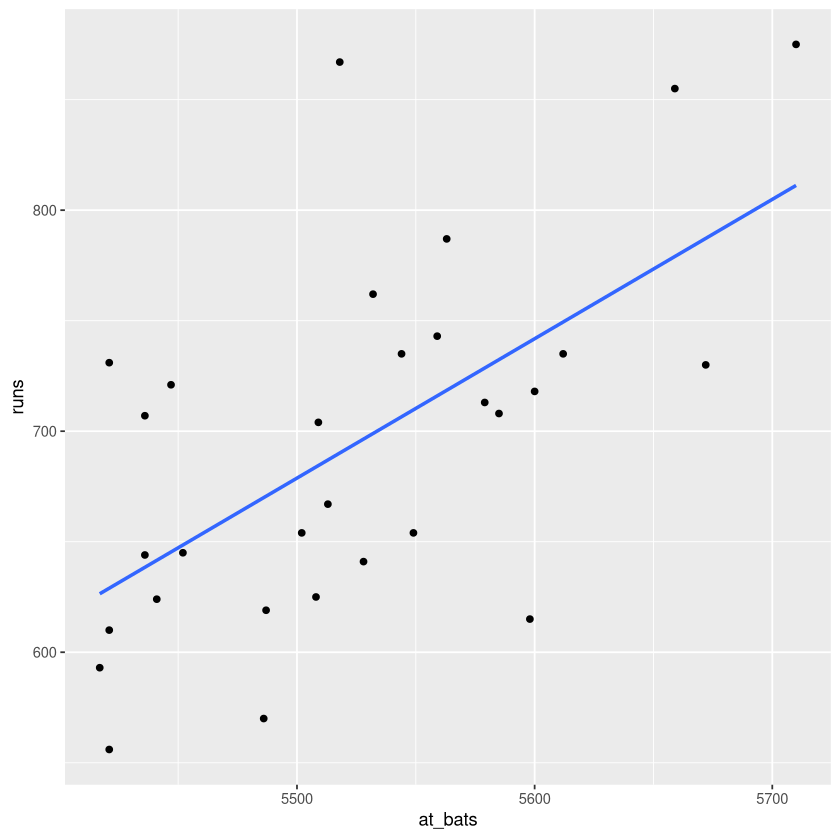

In [11]:
ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

Here we are literally adding a layer on top of our plot. `stat_smooth` creates
the line by fitting a linear model. It can also show us the standard error `se`
associated with our line, but we'll suppress that for now.

This line can be used to predict $y$ at any value of $x$. When 
predictions are made for values of $x$ that are beyond the range of the observed
data, it is referred to as *extrapolation* and is not usually recommended. 
However, predictions made within the range of the data are more reliable. 
They're also used to compute the residuals.

**Exercise**: If a team manager saw the least squares regression line and 
not the actual data, how many runs would he or she predict for a team with 
5,579 at-bats? Is this an overestimate or an underestimate, and by how much?


To find the observed number of runs for the team with 5,579 at bats you can use the following:

In [12]:
mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)

runs
<int>
713


This code first filters for rows observation. `at_bats` is 5579, and then shows the 
value of the `runs variable for that observation.

5. What is the residual for the prediction of runs for a team with 5,579 at-bats? Choose the closest answer. 
<ol>
<li> -15.32 </li>
<li> 15.32 </li>
<li> 713 </li>
<li> 5579 </li>
</ol>

**Answer**: A. -15.32

In [13]:
# type your code for Question 5 here, and Knit
y = 713
x = 5579
b0 = -2789.2429
b1 = 0.6305

y_hat = b0 + b1*x
y - y_hat

[1] -15.3166

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) 
linearity, (2) nearly normal residuals, and (3) constant variability.

**Linearity**: You already checked if the relationship between runs and at-bats
is linear using a scatterplot. We should also verify this condition with a plot 
of the residuals vs. fitted (predicted) values.

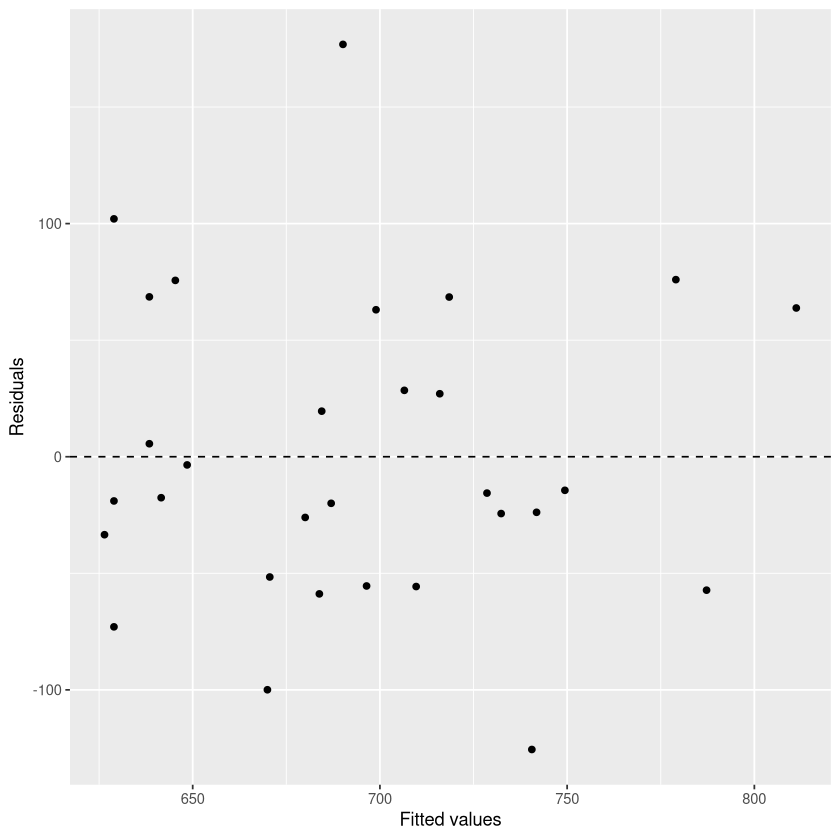

In [14]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

Notice here that our model object `m1` can also serve as a data set because stored within it are the fitted values ($\hat{y}$) and the residuals. Also note that we're getting fancy with the code here. After creating the scatterplot on the first layer (first line of code), we overlay a horizontal dashed line at $y = 0$ (to help us check whether residuals are distributed around 0), and we also adjust the axis labels to be more informative.

6. Which of the following statements about the residual plot is false? 
<ol>
<li> The residuals appear to be randomly distributed around 0. </li> 
<li> The residuals show a curved pattern. </li> 
<li> The plot is indicative of a linear relationship between runs and at-bats. </li> 
<li> The team with a very high residual compared to the others appears to be an outlier. </li>
</ol>

**Answer**: B. The residuals show a curved pattern.

***

**Nearly normal residuals**: To check this condition, we can look at a histogram

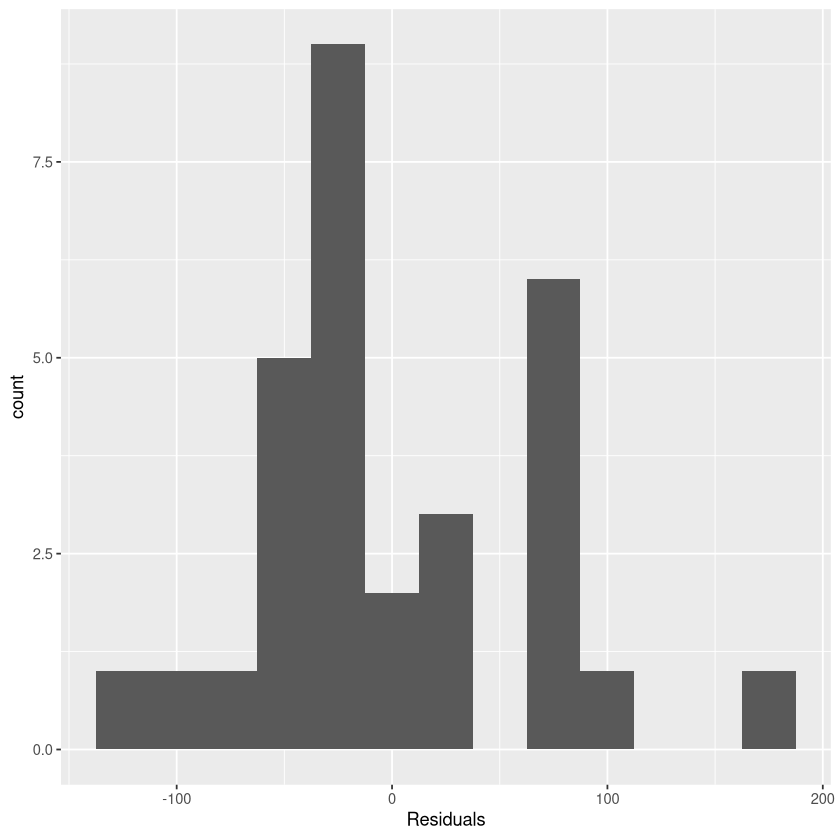

In [15]:
ggplot(data = m1, aes(x = .resid)) +
  geom_histogram(binwidth = 25) +
  xlab("Residuals")

or a normal probability plot of the residuals.

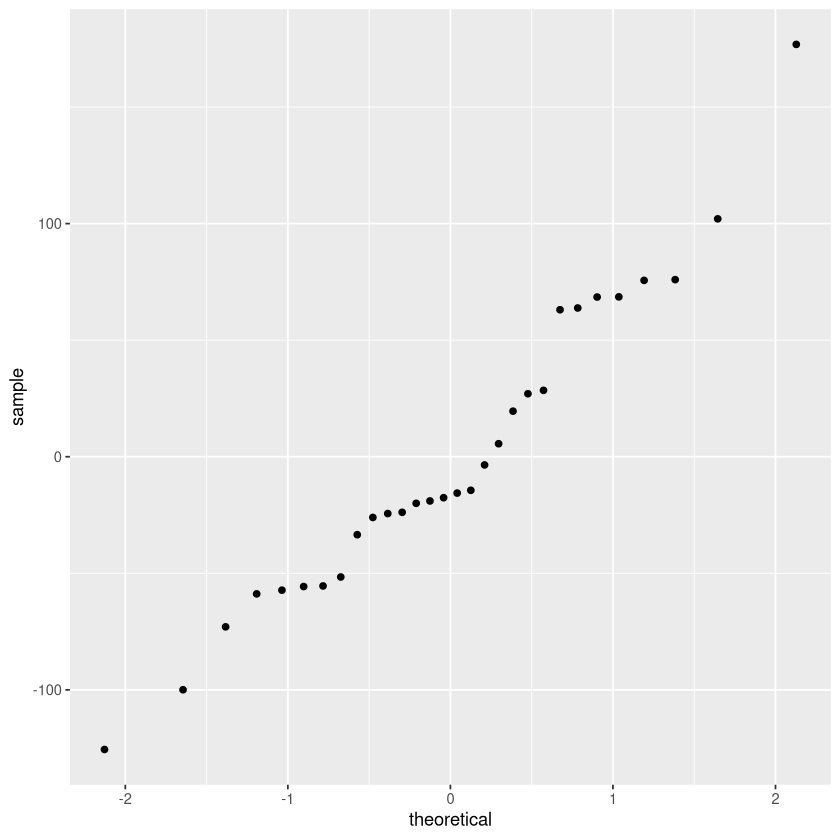

In [16]:
ggplot(data = m1, aes(sample = .resid)) +
  stat_qq()

Note that the syntax for making a normal probability plot is a bit different than what you're used to seeing: we set `sample` equal to the residuals instead of `x`, and we set a statistical method `qq`, which stands for "quantile-quantile", another name commonly used for normal probability plots.

7. Which of the following is true? 
<ol> 
<li> The residuals are extremely right skewed, hence the normal distribution of residuals condition is not met. </li>
<li> The residuals are extremely left skewed, hence the normal distribution of residuals condition is not met. </li> 
<li> The residuals are perfectly symmetric, hence the normal distribution of residuals condition is met. </li>
<li> The residuals are fairly symmetric, with only a slightly longer tail on the right, hence it would be appropriate to deem the normal distribution of residuals condition met. </li>
</ol>


**Answer**: D. The residuals are fairly simmetric, slightly rigth skewed.


**Constant variability**:

8. Based on the residuals plot from earlier, the constant variability condition appears to be met. 
<ol> 
<li> True </li>
<li> False </li>
</ol>

**Answer**: A. True

***

**Exercise**: Choose another one of the seven traditional variables from 
`mlb11` besides `at_bats` that you think might be a good predictor of `runs`. 
Produce a scatterplot of the two variables and fit a linear model. At a glance, 
does there seem to be a linear relationship?

`geom_smooth()` using formula 'y ~ x'



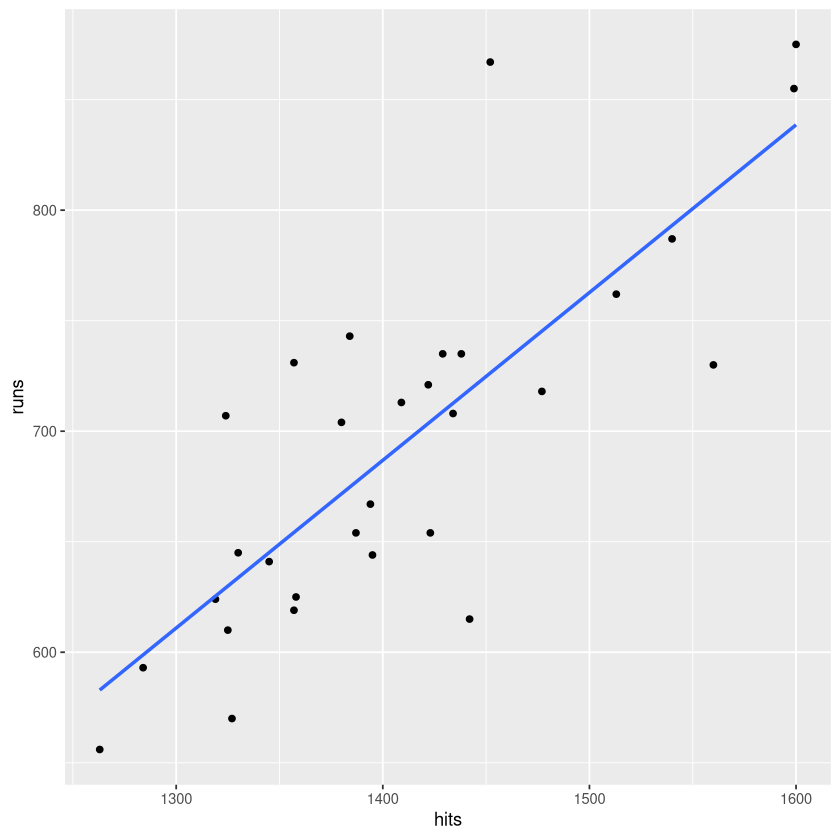

In [17]:
ggplot(data = mlb11, aes(x = hits, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

**Exercise**: How does this relationship compare to the relationship between 
`runs` and `at_bats`? Use the R$^2$ values from the two model summaries to 
compare. Does your variable seem to predict `runs` better than `at_bats`? How 
can you tell?

In this latter case the R$^2$ value is significantly higher than `at_bats` one. Despite both scatterplots presenting a linear relationship in terms of their shape, the `hits` show less dispersion around the fitted line.

In [18]:
# type your code for the Exercise here, and Knit

m3 <- lm(runs ~ hits, data = mlb11)
summary(m3)


Call:
lm(formula = runs ~ hits, data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.718  -27.179   -5.233   19.322  140.693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -375.5600   151.1806  -2.484   0.0192 *  
hits           0.7589     0.1071   7.085 1.04e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.23 on 28 degrees of freedom
Multiple R-squared:  0.6419,	Adjusted R-squared:  0.6292 
F-statistic:  50.2 on 1 and 28 DF,  p-value: 1.043e-07


9. Now that you can summarize the linear relationship between two variables, investigate the relationships between `runs` and each of the other five traditional variables. Which variable best predicts `runs`? Support your conclusion using the graphical and numerical methods we've discussed.
<ol>
<li> at bats </li>
<li> hits </li>
<li> wins </li>
<li> batting average </li>
</ol>

**Answer**: D. Batting Average


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


`geom_smooth()` using formula 'y ~ x'



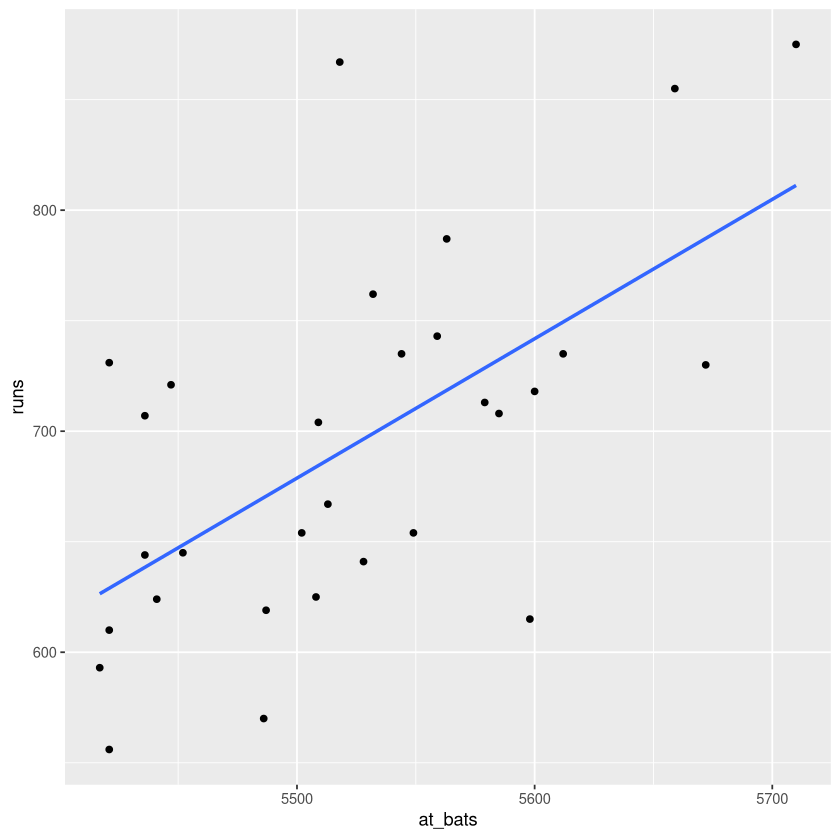

In [19]:
# type your code for Question 9 here, and Knit
summary(lm(runs ~ at_bats, data = mlb11))
ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)


Call:
lm(formula = runs ~ hits, data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.718  -27.179   -5.233   19.322  140.693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -375.5600   151.1806  -2.484   0.0192 *  
hits           0.7589     0.1071   7.085 1.04e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.23 on 28 degrees of freedom
Multiple R-squared:  0.6419,	Adjusted R-squared:  0.6292 
F-statistic:  50.2 on 1 and 28 DF,  p-value: 1.043e-07


`geom_smooth()` using formula 'y ~ x'



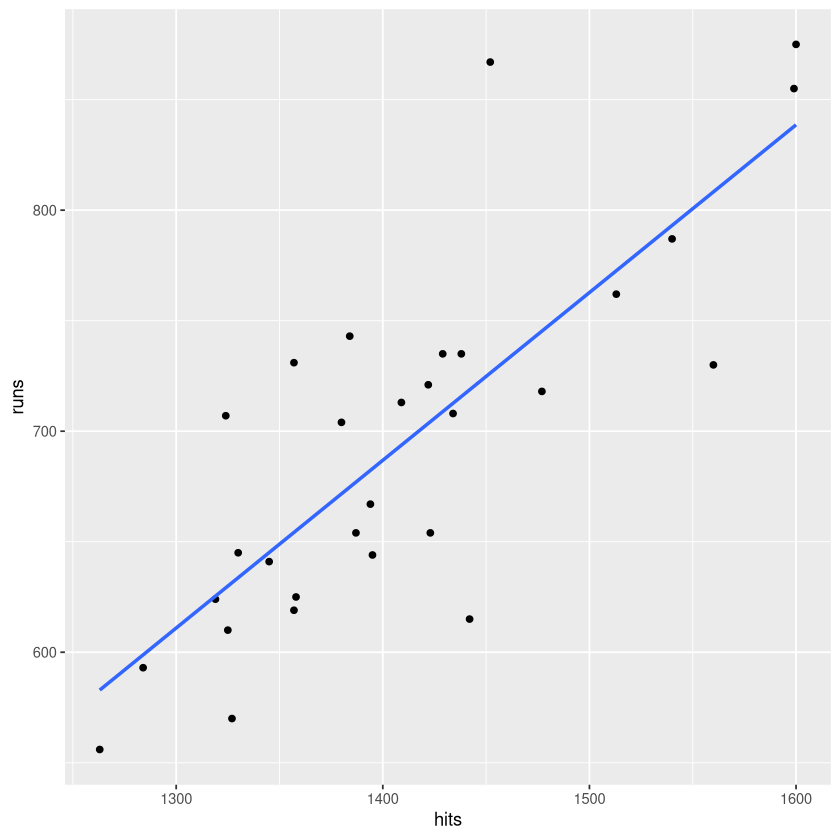

In [20]:
summary(lm(runs ~ hits, data = mlb11))
ggplot(data = mlb11, aes(x = hits, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)


Call:
lm(formula = runs ~ wins, data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.450  -47.506   -7.482   47.346  142.186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  342.121     89.223   3.834 0.000654 ***
wins           4.341      1.092   3.977 0.000447 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.1 on 28 degrees of freedom
Multiple R-squared:  0.361,	Adjusted R-squared:  0.3381 
F-statistic: 15.82 on 1 and 28 DF,  p-value: 0.0004469


`geom_smooth()` using formula 'y ~ x'



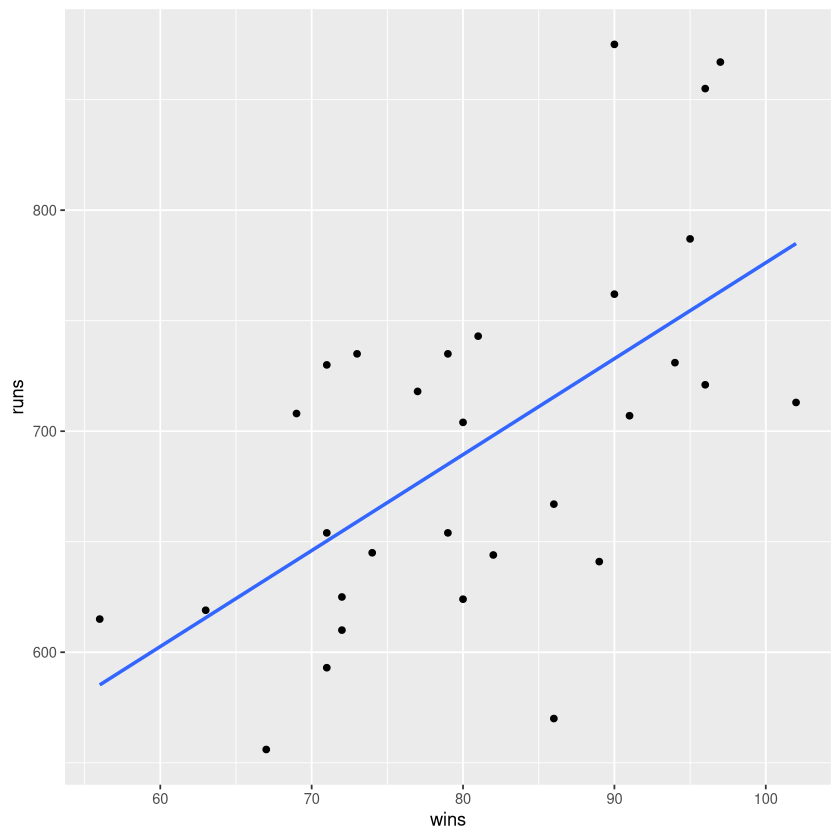

In [21]:
summary(lm(runs ~ wins, data = mlb11))
ggplot(data = mlb11, aes(x = wins, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)


Call:
lm(formula = runs ~ bat_avg, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.676 -26.303  -5.496  28.482 131.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -642.8      183.1  -3.511  0.00153 ** 
bat_avg       5242.2      717.3   7.308 5.88e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.23 on 28 degrees of freedom
Multiple R-squared:  0.6561,	Adjusted R-squared:  0.6438 
F-statistic: 53.41 on 1 and 28 DF,  p-value: 5.877e-08


`geom_smooth()` using formula 'y ~ x'



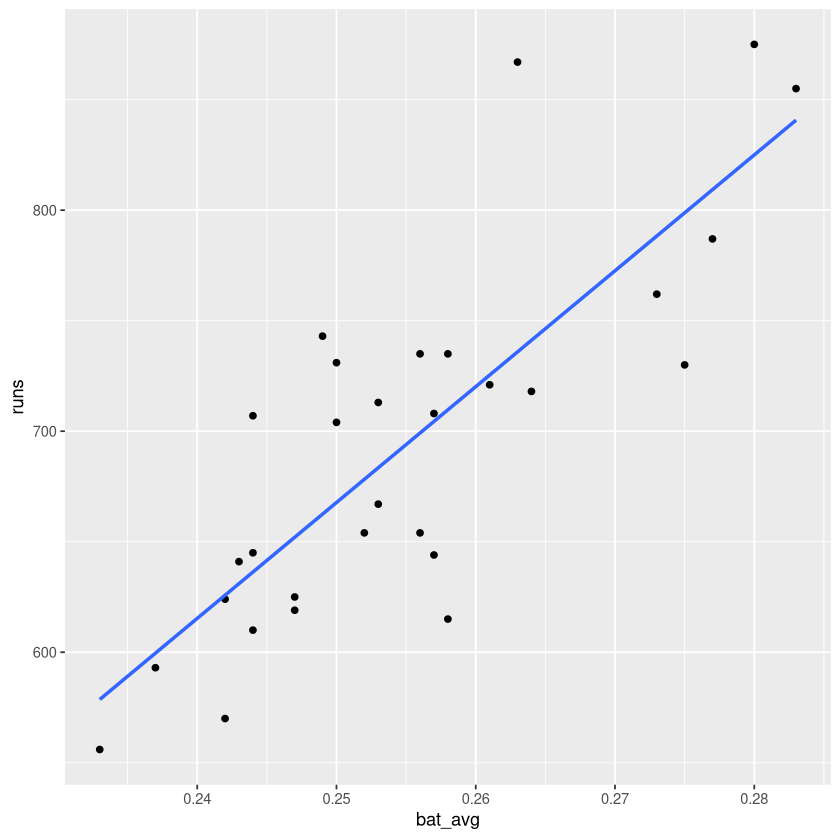

In [22]:
summary(lm(runs ~ bat_avg, data = mlb11))
ggplot(data = mlb11, aes(x = bat_avg, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

10. Now examine the three newer variables.  These are the statistics used by the author of *Moneyball* to predict a teams success.  In general, are they more or less effective at predicting runs that the old variables?  Explain using appropriate graphical and numerical evidence.  Of all ten variables we've analyzed, which seems to be the best predictor of `runs`? 
<ol>
<li> on-base plus slugging (`new_obs`) </li>
<li> slugging percentage (`new_slug`) </li> 
<li> on-base percentage (`new_onbase`) </li>
</ol>

**Answer**: A. On-base plus slugging is the one with highest R^2. The scatter plot shows fairly no outliers.


Call:
lm(formula = runs ~ new_obs, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.456 -13.690   1.165  13.935  41.156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -686.61      68.93  -9.962 1.05e-10 ***
new_obs      1919.36      95.70  20.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.41 on 28 degrees of freedom
Multiple R-squared:  0.9349,	Adjusted R-squared:  0.9326 
F-statistic: 402.3 on 1 and 28 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



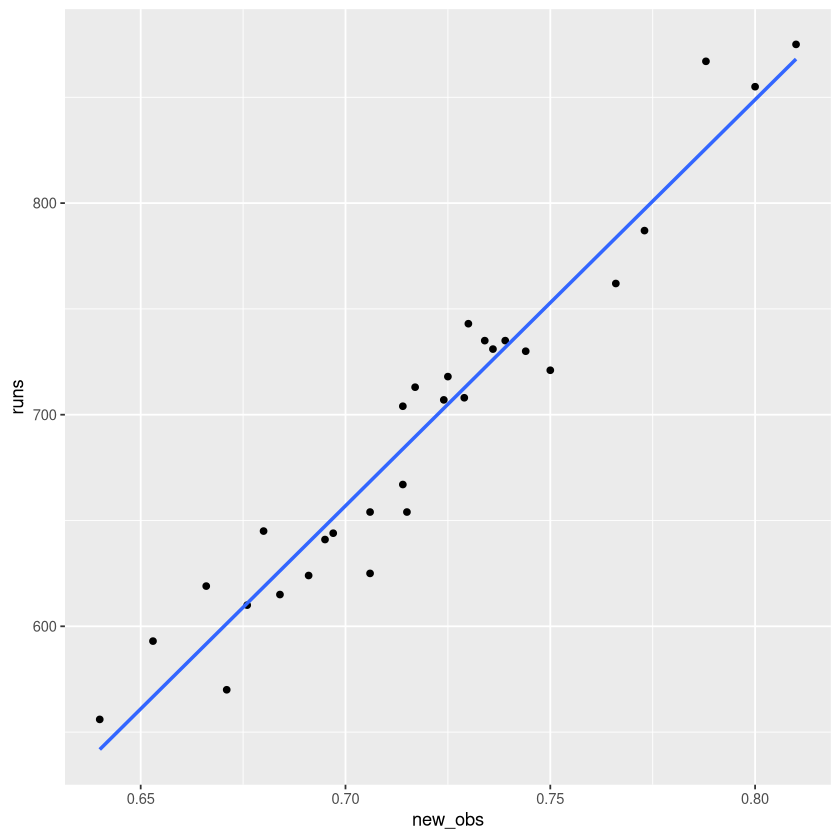

In [23]:
# type your code for Question 10 here, and Knit
summary(lm(runs ~ new_obs, data = mlb11))
ggplot(data = mlb11, aes(x = new_obs, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)


Call:
lm(formula = runs ~ new_slug, data = mlb11)

Residuals:
   Min     1Q Median     3Q    Max 
-45.41 -18.66  -0.91  16.29  52.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -375.80      68.71   -5.47 7.70e-06 ***
new_slug     2681.33     171.83   15.61 2.42e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.96 on 28 degrees of freedom
Multiple R-squared:  0.8969,	Adjusted R-squared:  0.8932 
F-statistic: 243.5 on 1 and 28 DF,  p-value: 2.42e-15


`geom_smooth()` using formula 'y ~ x'



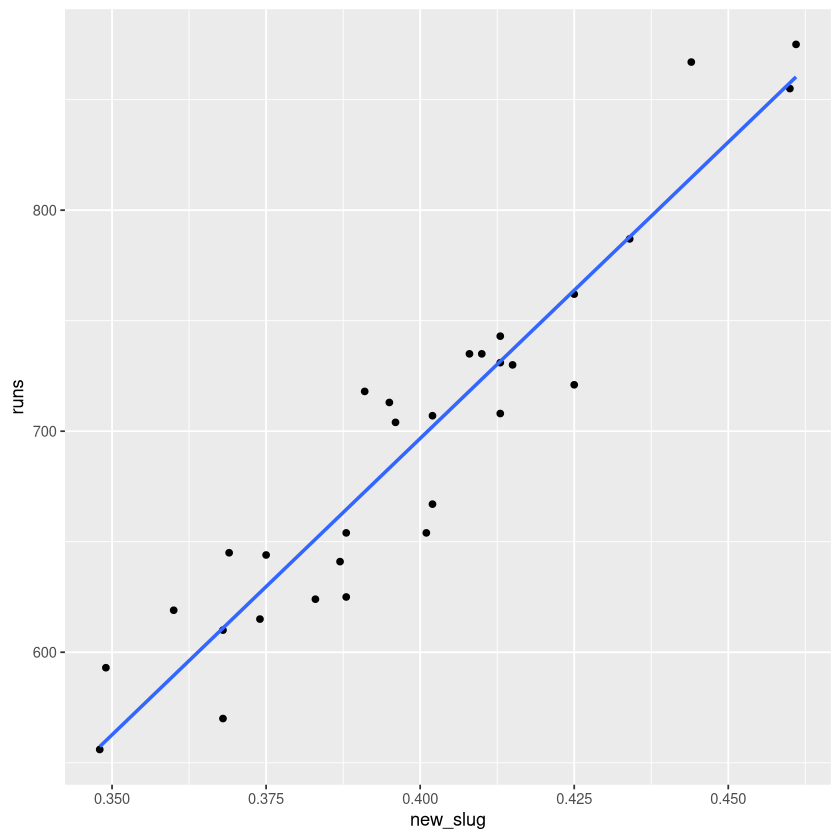

In [24]:
summary(lm(runs ~ new_slug, data = mlb11))
ggplot(data = mlb11, aes(x = new_slug, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)


Call:
lm(formula = runs ~ new_onbase, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.270 -18.335   3.249  19.520  69.002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1118.4      144.5  -7.741 1.97e-08 ***
new_onbase    5654.3      450.5  12.552 5.12e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.61 on 28 degrees of freedom
Multiple R-squared:  0.8491,	Adjusted R-squared:  0.8437 
F-statistic: 157.6 on 1 and 28 DF,  p-value: 5.116e-13


`geom_smooth()` using formula 'y ~ x'



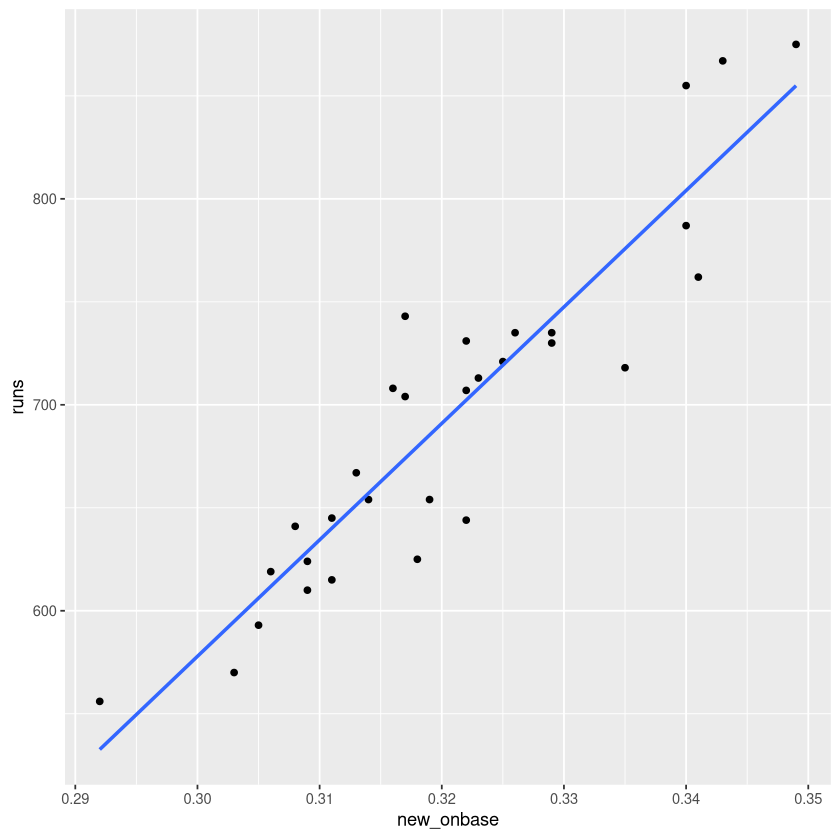

In [25]:
summary(lm(runs ~ new_onbase, data = mlb11))
ggplot(data = mlb11, aes(x = new_onbase, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

**Exercise**: Check the model diagnostics for the regression model with the 
variable you decided was the best predictor for runs.

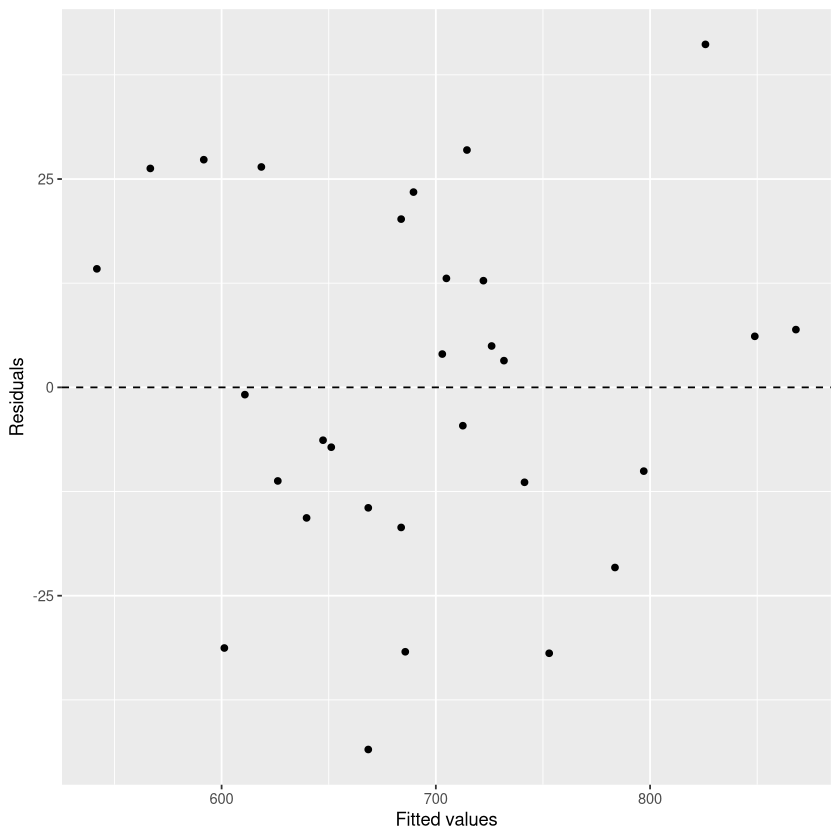

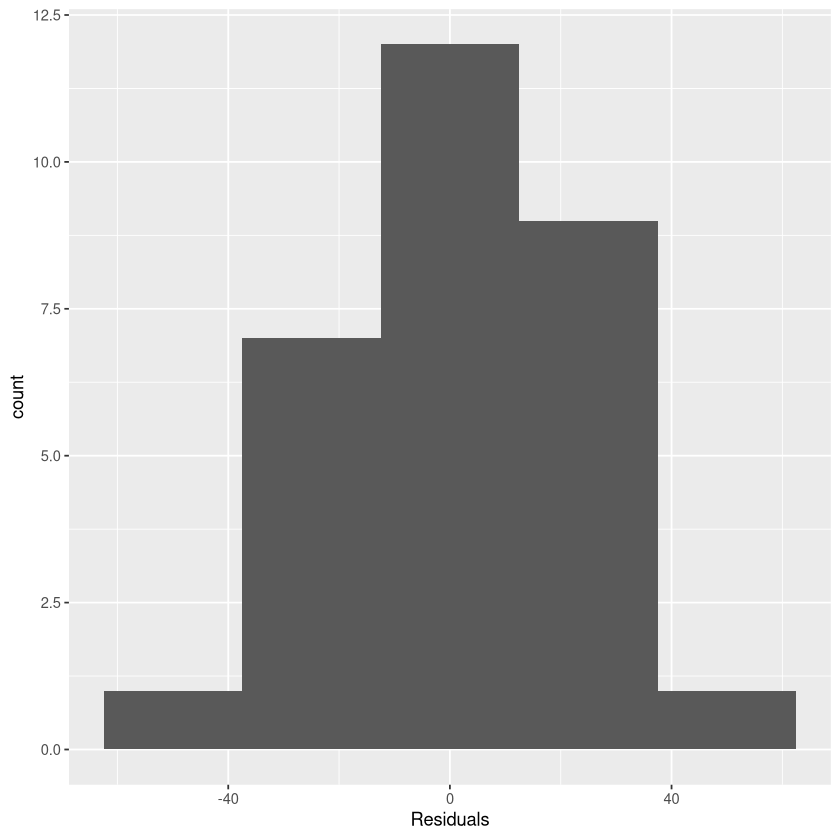

In [26]:
m4 <- lm(runs ~ new_obs, data = mlb11)

# type your code for the Exercise here, and Knit
ggplot(data = m4, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

ggplot(data = m4, aes(x = .resid)) +
  geom_histogram(binwidth = 25) +
  xlab("Residuals")

The diagnostics show an excellent performance for this particular parameter.

<div id="license">
This is a product of OpenIntro that is released under a [Creative Commons 
Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0). 
This lab was adapted for OpenIntro by Andrew Bray and Mine &Ccedil;etinkaya-Rundel 
from a lab written by the faculty and TAs of UCLA Statistics.
</div>